## Chapter_03 - Projecting and Transforming Geometries
---
#### Exercise_01 : Geographic vs projected coordinates

The CRS attribute stores the information about the Coordinate Reference System in which the data is represented. In this exercises, we will explore the CRS and the coordinates of the districts dataset about the districts of Paris.

#### Instructions
- Look at the CRS attribute of the GeoDataFrame. Do you recognize the `EPSG number`?
- Look at the values of the coordinates. What is the range, and what are the differences between different points? Can this be meters, or are it degrees?

In [2]:
import pandas
import geopandas
import contextily
import matplotlib.pyplot as plt

In [3]:
# Import the districts dataset
districts = geopandas.read_file("paris_districts.geojson")

In [4]:
# Print the CRS information
print(districts.crs)


EPSG:4326


In [5]:
# Print the first rows of the GeoDataFrame
print(districts.head(5))

   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((2.34459 48.85405, 2.34459 48.85405, ...  
1  POLYGON ((2.34937 48.86058, 2.34822 48.85852, ...  
2  POLYGON ((2.33947 48.86214, 2.33912 48.86148, ...  
3  POLYGON ((2.33194 48.86491, 2.33135 48.86399, ...  
4  POLYGON ((2.33632 48.86797, 2.33587 48.867, 2....  


#### Exercise_02 : Projecting a GeoDataFrame

The Paris districts dataset is provided in geographical coordinates (longitude/latitude in WGS84). To see the result of naively using the data as is for plotting or doing calculations, we will first plot the data as is, and then plot a projected version.

The standard projected CRS for France is the RGF93 / Lambert-93 reference system (referenced by the EPSG:2154 number).

GeoPandas and matplotlib have already been imported, and the districts dataset is read and assigned to the districts variable.

#### Instructions
- Print the CRS of the districts dataset.
- Make a simple plot of the districts dataset.
- Convert the districts to a projected CRS (using the` EPSG:2154 for France`). Call the new dataset `districts_RGF93.`
- Make a similar plot of `districts_RGF93.`

In [6]:
# Print the CRS information
print(districts.crs)

EPSG:4326


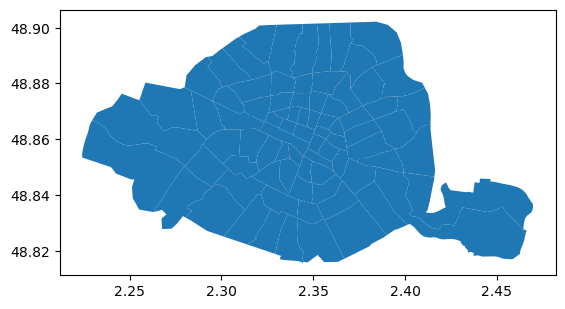

In [7]:
# Plot the districts dataset
districts.plot()
plt.show()

In [8]:
# Convert the districts to the RGF93 reference system
districts_RGF93 = districts.to_crs(epsg=2154)

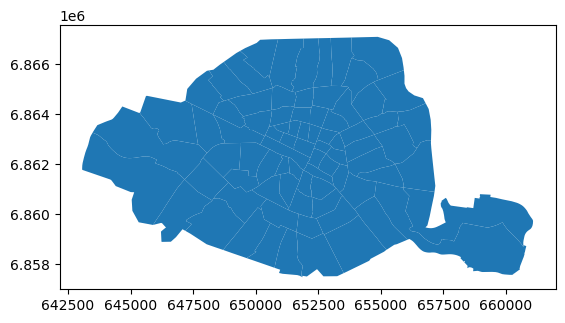

In [9]:
# Plot the districts dataset again
districts_RGF93.plot()
plt.show()

#### Exercise_03 : Projecting a Point

In the previous chapter, we worked with the Eiffel Tower location. Again, we provided you the coordinates in a projected coordinate system, so you could, for example, calculate distances. Let's return to this iconic landmark, and express its location in geographical coordinates: `48°51′29.6″N, 2°17′40.2″E`. Or, in decimals: `latitude of 48.8584 and longitude of 2.2945.`

Shapely geometry objects have no notion of a CRS, and thus cannot be directly converted to another CRS. Therefore, we are going to use the GeoPandas to transform the Eiffel Tower point location to an alternative CRS. We will put the single point in a GeoSeries, use the `to_crs()` method, and extract the point again.

GeoPandas is already imported.

#### Instructions
- Create a shapely point object with the coordinates of the Eiffel Tower and assign it to a variable called `eiffel_tower.`
- Create a GeoSeries (called s_eiffel_tower) with the Eiffel Tower as the single element and specify the CRS to be `EPSG:4326.`
- Convert s_eiffel_tower to EPSG:2154, and call the result `s_eiffel_tower_projected`

In [10]:
# Construct a Point object for the Eiffel Tower
from shapely.geometry import Point
eiffel_tower = Point(2.2945, 48.8584)

In [11]:
# Put the point in a GeoSeries with the correct CRS
s_eiffel_tower = geopandas.GeoSeries([eiffel_tower], crs={'init': 'epsg:4326'})

c:\Users\Asus\miniconda3\envs\geo\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [12]:
# Convert to other CRS
s_eiffel_tower_projected = s_eiffel_tower.to_crs(epsg=2154)

In [13]:
# Print the projected point
print(s_eiffel_tower_projected)

0    POINT (648237.302 6862271.682)
dtype: geometry


#### Exercise_04 : Calculating distance in a projected CRS

Now we have the Eiffel Tower location in a projected coordinate system, we can calculate the distance to other points.

The final s_eiffel_tower_projected of the previous exercise containing the projected Point is already provided, and we extract the single point into the eiffel_tower variable. Further, the restaurants dataframe (using WGS84 coordinates) is also loaded.

#### Instructions
- Convert the restaurants to the same CRS as the Eiffel Tower point. For this exercise, don't specify the epsg keyword, but make use of the `.crs` attribute.
- Calculate the distance for all restaurants to the Eiffel Tower.
- Print the smallest distance.

In [ ]:
# import pandas as pd
# import geopandas as gpd

# # Step 1: Load the CSV
# df = pd.read_csv("paris_restaurants.csv")

# # Step 2: Create GeoDataFrame using x and y coordinates
# restaurants = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y))

# # Step 3: Set the original CRS
# restaurants.set_crs(epsg=2154, inplace=True) 

# # Step 4: Convert to WGS84
# restaurants = restaurants.to_crs(epsg=4326)

# # Optional: Save as new file
# restaurants.to_file("paris_restaurants_wgs84.geojson", driver="GeoJSON")


In [26]:
restaurants = geopandas.read_file("paris_restaurants_wgs84.geojson")

In [27]:
restaurants.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Extract the single Point
eiffel_tower = s_eiffel_tower_projected[0]

In [29]:
# Ensure the restaurants use the same CRS
restaurants = restaurants.to_crs(s_eiffel_tower_projected.crs)

In [30]:
restaurants.crs

<Projected CRS: EPSG:2154>
Name: RGF93 v1 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica (France métropolitaine including Corsica).
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [31]:
# The distance from each restaurant to the Eiffel Tower
dist_eiffel = restaurants.geometry.distance(eiffel_tower)


In [32]:
# The distance to the closest restaurant
print(dist_eiffel.min())

715697.9240850501


#### Exercise_05 : Projecting to Web Mercator for using web tiles

In the first chapter, we did an exercise on plotting the restaurant locations in Paris and adding a background map to it using the `contextily` package.

Currently, contextily assumes that your data is in the Web Mercator projection, the system used by most web tile services. And in that first exercise, we provided the data in the appropriate CRS so you didn't need to care about this aspect.

However, typically, your data will not come in Web Mercator `(EPSG:3857)` and you will have to align them with web tiles on your own.

GeoPandas, matplotlib and contextily are already imported.

#### Instructions
- Convert the restaurants dataset to the Web Mercator projection `(EPSG:3857).` Call the result restaurants_webmercator.
- Make a plot of this projected dataset (specify the `marker size to be 1`) and add a background map using contextily.

In [33]:
# Convert to the Web Mercator projection
restaurants_webmercator = restaurants.to_crs(epsg=3857)

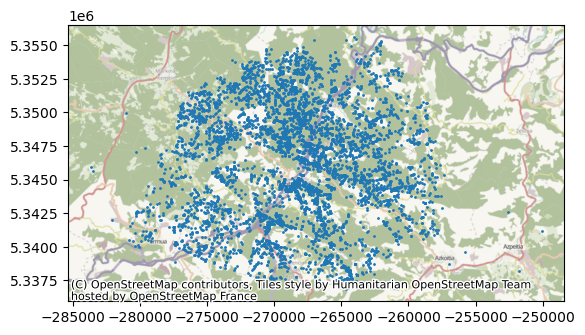

In [34]:
# Plot the restaurants with a background map

ax = restaurants_webmercator.plot(markersize=1)
contextily.add_basemap(ax)
plt.show()

#### Exercise_06 : Exploring a Land Use dataset

For the following exercises, we first introduce a new dataset: a dataset about the land use of Paris (a simplified version based on the open European Urban Atlas). The land use indicates for what kind of activity a certain area is used, such as residential area or for recreation. It is a polygon dataset, with a label representing the land use class for different areas in Paris.

In this exercise, we will read the data, explore it visually, and calculate the total area of the different classes of land use in the area of Paris.

GeoPandas and matplotlib are already imported.

#### Instructions
- Read in the `'paris_land_use.shp'` file and assign the result to a variable land_use.
- Make a plot of land_use, using the `'class'` column to color the polygons. We also add a legend. Note: it might take a few seconds for the plot to generate because there are a lot of polygons.
- Add a new column `'area'` with the area of each polygon.
- Calculate the total area in km² for each `'class'` using the groupby() method, and print the result.

In [35]:
# Import the land use dataset
land_use = geopandas.read_file('paris_land_use.shp')
print(land_use.head())

                       class  \
0               Water bodies   
1  Roads and associated land   
2  Roads and associated land   
3  Roads and associated land   
4  Roads and associated land   

                                            geometry  
0  POLYGON ((3751386.281 2890064.323, 3751395.345...  
1  POLYGON ((3751390.345 2886000, 3751390.345 288...  
2  POLYGON ((3751390.345 2886898.192, 3751390.37 ...  
3  POLYGON ((3751390.345 2887500, 3751390.345 288...  
4  POLYGON ((3751390.345 2888647.357, 3751390.37 ...  


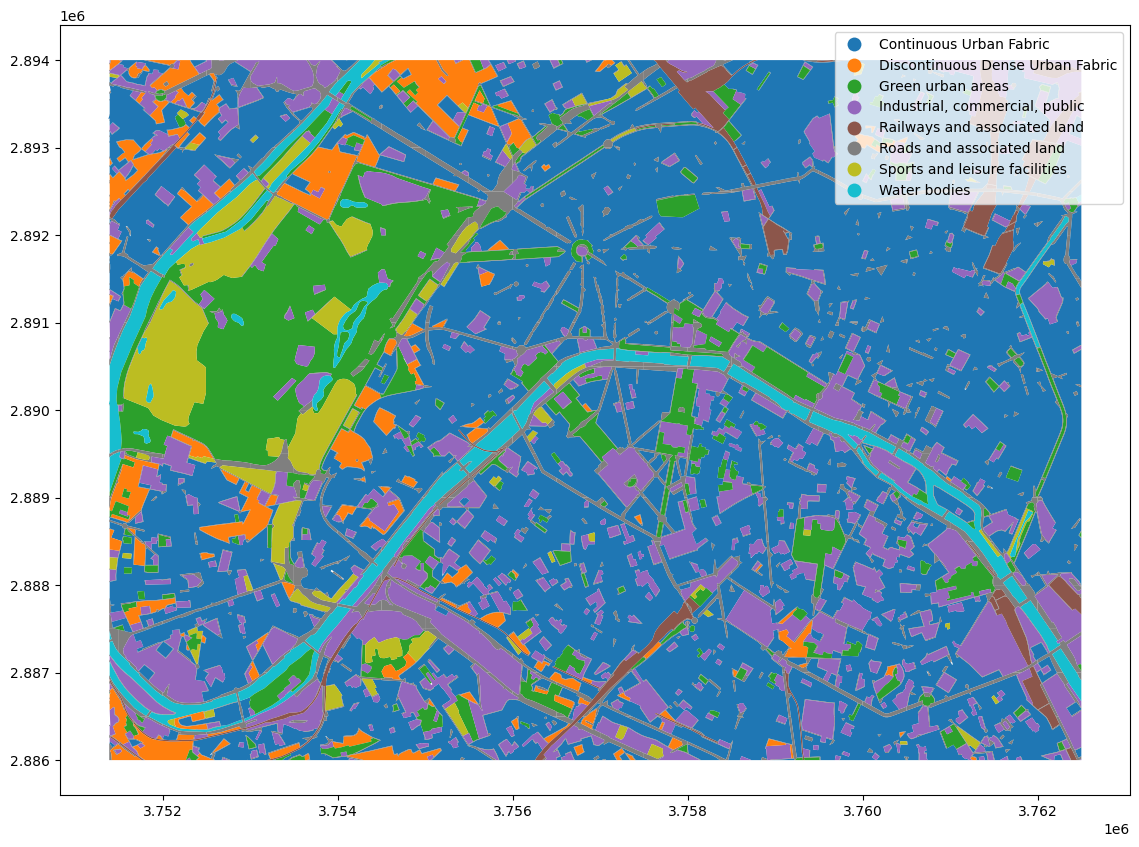

In [36]:
# Make a plot of the land use with 'class' as the color
land_use.plot(column='class', legend=True, figsize=(15, 10))
plt.show()

In [37]:
# Add the area as a new column
land_use['area'] = land_use.area

In [38]:
land_use

,class,geometry,area
0,Water bodies,"POLYGON ((3751386.281 2890064.323, 3751395.345...",294578.751217
1,Roads and associated land,"POLYGON ((3751390.345 2886000, 3751390.345 288...",5420.710856
2,Roads and associated land,"POLYGON ((3751390.345 2886898.192, 3751390.37 ...",2949.568985
3,Roads and associated land,"POLYGON ((3751390.345 2887500, 3751390.345 288...",8475.451252
4,Roads and associated land,"POLYGON ((3751390.345 2888647.357, 3751390.37 ...",400.972555
...,...,...,...
3238,Green urban areas,"POLYGON ((3762500 2887018.698, 3762458.012 288...",1774.638176
3239,Water bodies,"POLYGON ((3762500 2892386.959, 3762470.299 289...",3384.185687
3240,Continuous Urban Fabric,"POLYGON ((3762500 2891470.236, 3762467.383 289...",85544.939178
3241,Continuous Urban Fabric,"POLYGON ((3762500 2892463.878, 3762444.008 289...",12888.005359


In [39]:
# Calculate the total area for each land use class
total_area = land_use.groupby('class')['area'].sum() / 1000**2
print(total_area)

class
Continuous Urban Fabric             45.943090
Discontinuous Dense Urban Fabric     3.657343
Green urban areas                    9.858438
Industrial, commercial, public      13.295042
Railways and associated land         1.935793
Roads and associated land            7.401574
Sports and leisure facilities        3.578509
Water bodies                         3.189706
Name: area, dtype: float64


#### Exercise_07 : Intersection of two polygons

For this exercise, we are going to use 2 individual polygons: the district of `Muette` extracted from the districts dataset, and the green urban area of Boulogne, a large public park in the west of Paris, extracted from the `land_use` dataset. The two polygons have already been assigned to the muette and park_boulogne variables.

We first visualize the two polygons. You will see that they overlap, but the park is not fully located in the district of Muette. Let's determine the overlapping part.

GeoPandas and matplotlib and are already imported.

#### Instructions
- Plot the two polygons in a single map to examine visually the degree of overlap
- Calculate the intersection of the `park_boulogne` and `muette` polygons.
- Print the proportion of the area of the district that is occupied by the park.

In [55]:
# Read the Paris districts dataset
districts = geopandas.read_file('paris_districts.geojson')
districts

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((2.34459 48.85405, 2.34459 48.85405, ..."
1,2,Halles,8984,"POLYGON ((2.34937 48.86058, 2.34822 48.85852, ..."
2,3,Palais-Royal,3195,"POLYGON ((2.33947 48.86214, 2.33912 48.86148, ..."
3,4,Place-Vendôme,3044,"POLYGON ((2.33194 48.86491, 2.33135 48.86399, ..."
4,5,Gaillon,1345,"POLYGON ((2.33632 48.86797, 2.33587 48.867, 2...."
...,...,...,...,...
75,76,Combat,38988,"POLYGON ((2.38834 48.88057, 2.3895 48.87955, 2..."
76,77,Belleville,35773,"POLYGON ((2.38323 48.8671, 2.38314 48.86708, 2..."
77,78,Saint-Fargeau,42087,"POLYGON ((2.41381 48.87081, 2.41383 48.87066, ..."
78,79,Père-Lachaise,42332,"POLYGON ((2.39536 48.8567, 2.39444 48.85657, 2..."


In [126]:
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [128]:
districts_RGF93.crs

<Projected CRS: EPSG:2154>
Name: RGF93 v1 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica (France métropolitaine including Corsica).
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [127]:
land_use.crs

<Projected CRS: PROJCS["Lambert_Azimuthal_Equal_Area",GEOGCS["GCS_ ...>
Name: Lambert_Azimuthal_Equal_Area
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Azimuthal Equal Area
Datum: unknown
- Ellipsoid: GRS80
- Prime Meridian: Greenwich

In [130]:
land_use_projected = land_use.to_crs(districts_RGF93.crs)

c:\Users\Asus\miniconda3\envs\geo\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


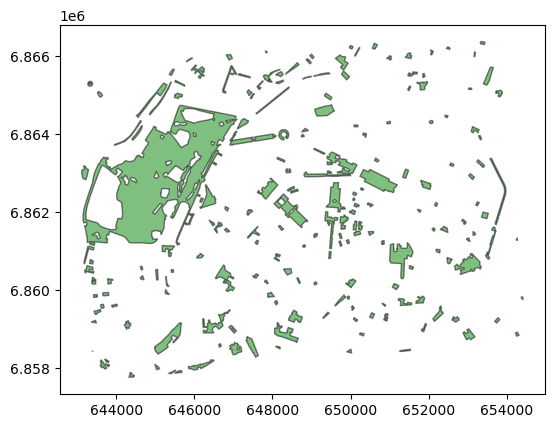

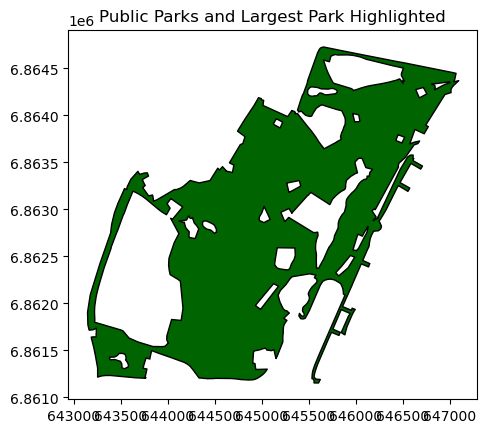

In [131]:
# Example: Filter for parks or green spaces
parks = land_use_projected[land_use_projected['class'].str.contains('park|green|recreation', case=False, na=False)]

# Optional: Sort by area to get the largest one
parks['area'] = parks.geometry.area
largest_park = parks.sort_values(by='area', ascending=False).iloc[0]

# Plot the result
parks.plot(color='green', alpha=0.5, edgecolor='black')
gpd.GeoSeries([largest_park.geometry]).plot(color='darkgreen', edgecolor='black')
plt.title('Public Parks and Largest Park Highlighted')
plt.show()

In [132]:
largest_park_gdf = gpd.GeoDataFrame([largest_park], crs=districts_RGF93.crs)

# Export to GeoJSON
largest_park_gdf.to_file("largest_park.geojson", driver="GeoJSON")

In [133]:
muette =districts_RGF93[districts_RGF93['district_name'] == 'Muette'].geometry.iloc[0]

In [135]:
park_boulogne_prep = geopandas.read_file("largest_park.geojson")

In [ ]:
# park_boulogne =park_boulogne_prep[park_boulogne_prep['class'] == 'Green urban areas'].geometry.iloc[0]

In [162]:
park_boulogne= park_boulogne_prep.geometry.iloc[0]

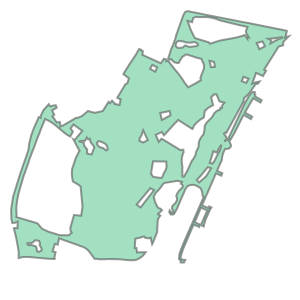

In [163]:
park_boulogne

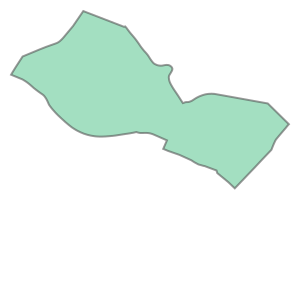

In [138]:
muette

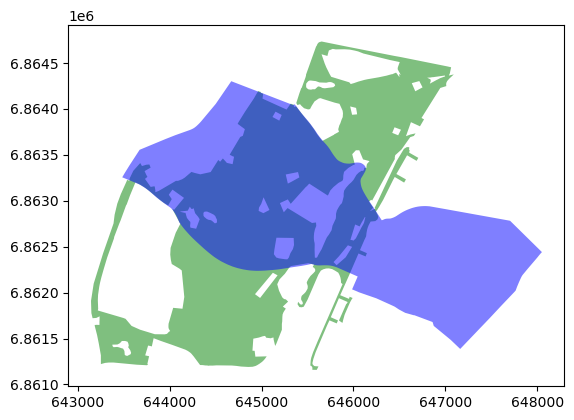

In [164]:
# Plot the two polygons
geopandas.GeoSeries([park_boulogne, muette]).plot(alpha=0.5, color=['green', 'blue'])
plt.show()

In [165]:
# Calculate the intersection of both polygons
intersection = park_boulogne.intersection(muette)

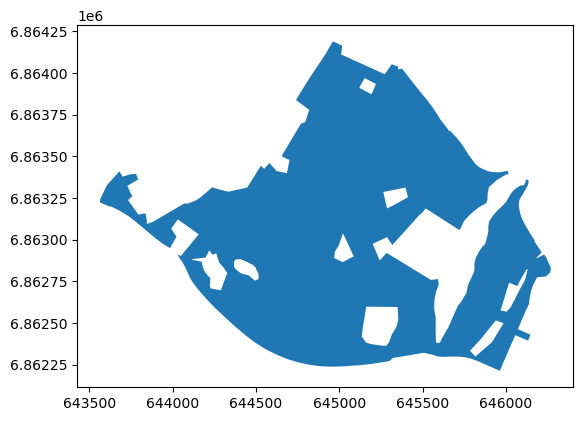

In [166]:

# Plot the intersection
geopandas.GeoSeries([intersection]).plot()
plt.show()

In [154]:
# Print proportion of district area that occupied park
print(intersection.area / muette.area)

0.4352093960815057


#### Exercise_08 : Intersecting a GeoDataFrame with a Polygon

Combining the land use dataset and the districts dataset, we can now investigate what the land use is in a certain district.

For that, we first need to determine the intersection of the land use dataset with a given district. Let's take again the Muette district as example case.

The land use and districts datasets have already been imported as land_use and districts, and the Muette district has been extracted into the muette shapely polygon. Further, GeoPandas and matplotlib are imported.

#### Instructions
- Calculate the intersection of the land_use polygons with the single muette polygon. Call the result land_use_muette.
- Make a quick plot of this intersection, and pass `edgecolor='black'` to more clearly see the boundaries of the different polygons.
- Print the first five rows of `land_use_muette.`

In [182]:
land_use_projected.crs

<Projected CRS: EPSG:2154>
Name: RGF93 v1 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica (France métropolitaine including Corsica).
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [188]:
# Print the land use datset and muette district polygon
print(land_use.head())
print(type(muette))

                       class  \
0               Water bodies   
1  Roads and associated land   
2  Roads and associated land   
3  Roads and associated land   
4  Roads and associated land   

                                            geometry           area  
0  POLYGON ((3751386.281 2890064.323, 3751395.345...  294578.751217  
1  POLYGON ((3751390.345 2886000, 3751390.345 288...    5420.710856  
2  POLYGON ((3751390.345 2886898.192, 3751390.37 ...    2949.568985  
3  POLYGON ((3751390.345 2887500, 3751390.345 288...    8475.451252  
4  POLYGON ((3751390.345 2888647.357, 3751390.37 ...     400.972555  
<class 'shapely.geometry.polygon.Polygon'>


In [190]:
muette_geom = districts[districts['district_name'].str.contains('muette', case=False, na=False)].geometry.iloc[0]

# Wrap it in a GeoSeries with the original CRS
muette_gs = gpd.GeoSeries([muette_geom], crs=districts.crs)

# Reproject it to match the land_use CRS
muette_projected = muette_gs.to_crs(land_use.crs).iloc[0]  # Get the reprojected geometry

In [ ]:
# Calculate the intersection of the land use polygons with muette
land_use_muette = land_use.intersection(muette_projected)

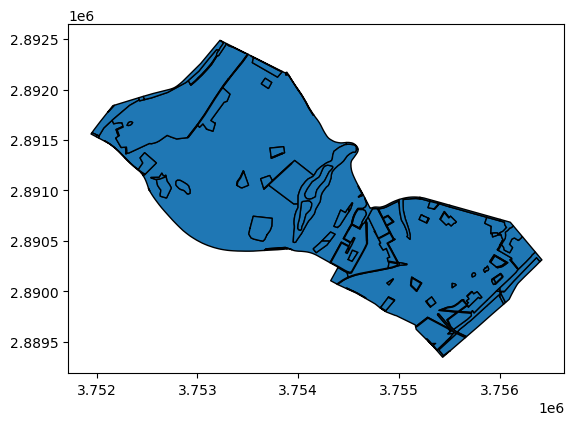

In [194]:
# Plot the intersection
land_use_muette.plot(edgecolor='black')
plt.show()

In [195]:

# Print the first five rows of the intersection
print(land_use_muette.head(5))

0    POLYGON EMPTY
1    POLYGON EMPTY
2    POLYGON EMPTY
3    POLYGON EMPTY
4    POLYGON EMPTY
dtype: geometry


#### Exercise_09 : Overlay of two polygon layers

Going back to the land use and districts datasets, we will now combine both datasets in an overlay operation. Create a new GeoDataFrame consisting of the intersection of the land use polygons with each of the districts, but make sure to bring the attribute data from both source layers.

#### Instructions
- Print the first rows of both datasets (land_use and districts).
- Create a new GeoDataFrame from the intersections of land_use and districts. Assign the result to a variable combined.
- Print the first rows the resulting GeoDataFrame (combined).

In [205]:
# Print the first five rows of both datasets
print(land_use_projected.head(5))
print(districts_RGF93.head(5))

# Overlay both datasets based on the intersection
combined = geopandas.overlay(land_use_projected, districts_RGF93, how='intersection')

# Print the first five rows of the result
print(combined.head(5))

                       class  \
0               Water bodies   
1  Roads and associated land   
2  Roads and associated land   
3  Roads and associated land   
4  Roads and associated land   

                                            geometry           area  
0  POLYGON ((643066.522 6861714.735, 643071.265 6...  294578.751217  
1  POLYGON ((643450.319 6857672.057, 643432.773 6...    5420.710856  
2  POLYGON ((643366.413 6858565.546, 643366.392 6...    2949.568985  
3  POLYGON ((643310.19 6859164.205, 643278.04 685...    8475.451252  
4  POLYGON ((643202.986 6860305.562, 643202.964 6...     400.972555  
   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((651908.563 6861756.318, 651908.51 68...  
1  POL

C:\Users\Asus\AppData\Local\Temp\ipykernel_3936\2032441808.py:6: UserWarning: `keep_geom_type=True` in overlay resulted in 18 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  combined = geopandas.overlay(land_use_projected, districts_RGF93, how='intersection')


#### Exercise_10 : Inspecting the overlay result

Now that we created the overlay of the land use and districts datasets, we can more easily inspect the land use for the different districts. Let's get back to the example district of Muette, and inspect the land use of that district.

#### Instructions
- Add a new column '`area'` with the area of each polygon to the combined GeoDataFrame.
- Create a subset called land_use_muette where the `'district_name'` is equal to `"Muette".`
- Make a plot of `land_use_muette`, using the `'class'` column to color the polygons.
- Calculate the total area for each 'class' of `land_use_muette` using the `groupby()` method, and print the result.

In [206]:
# Print the first rows of the overlay result
print(combined.head(5))


                       class          area  id district_name  population  \
0               Water bodies  2.945788e+05  61       Auteuil       67967   
1    Continuous Urban Fabric  1.788807e+06  61       Auteuil       67967   
2  Roads and associated land  1.621907e+03  61       Auteuil       67967   
3          Green urban areas  5.296073e+06  61       Auteuil       67967   
4          Green urban areas  5.296073e+06  62        Muette       45214   

                                            geometry  
0  POLYGON ((643531.919 6863214.709, 643531.919 6...  
1  MULTIPOLYGON (((645069.268 6860258.682, 645074...  
2  POLYGON ((643202.028 6861724.893, 643237.496 6...  
3  MULTIPOLYGON (((643237.496 6861742.009, 643202...  
4  POLYGON ((643565.036 6863244.551, 643604.558 6...  


In [207]:
# Add the area as a column
combined['area'] = combined.area

In [208]:
# Take a subset for the Muette district
land_use_muette = combined[combined['district_name'] == "Muette"]

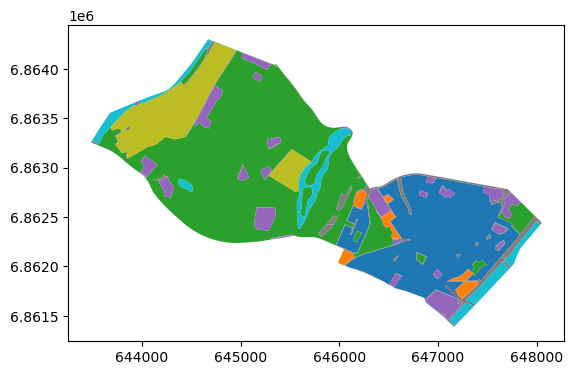

In [209]:
# Visualize the land use of the Muette district
land_use_muette.plot(column='class')
plt.show()
# # Calculate the total area for each land use class

In [210]:

print(land_use_muette.groupby('class')['area'].sum() / 1000**2)

class
Continuous Urban Fabric             1.275026
Discontinuous Dense Urban Fabric    0.088270
Green urban areas                   2.623696
Industrial, commercial, public      0.362915
Railways and associated land        0.005423
Roads and associated land           0.226224
Sports and leisure facilities       0.603870
Water bodies                        0.292134
Name: area, dtype: float64
